In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
from sklearn.linear_model import LinearRegression

#CovidActNow Packages
import json
from pprint import pprint
import requests
import statsmodels.api as sm


API_KEY = '1a0be95a988649d9a632bf27231c22d3' 

stateDictionary = {
    "AL": "Alabama",
    "AS": "American Samoa",
    "AK": "Alaska",
    "AZ": "Arizona",
    "AR": "Arkansas",
    "CA": "California",
    "CO": "Colorado",
    "CT": "Connecticut",
    "DE": "Delaware",
    "FL": "Florida",
    "GA": "Georgia",
    "HI": "Hawaii",
    "ID": "Idaho",
    "IL": "Illinois",
    "IN": "Indiana",
    "IA": "Iowa",
    "KS": "Kansas",
    "KY": "Kentucky",
    "LA": "Louisiana",
    "ME": "Maine",
    "MD": "Maryland",
    "MA": "Massachusetts",
    "MI": "Michigan",
    "MN": "Minnesota",
    "MS": "Mississippi",
    "MO": "Missouri",
    "MT": "Montana",
    "NE": "Nebraska",
    "NV": "Nevada",
    "NH": "New Hampshire",
    "NJ": "New Jersey",
    "NM": "New Mexico",
    "NY": "New York",
    "NC": "North Carolina",
    "ND": "North Dakota",
    "OH": "Ohio",
    "OK": "Oklahoma",
    "OR": "Oregon",
    "PA": "Pennsylvania",
    "PR": "Puerto Rico",
    "RI": "Rhode Island",
    "SC": "South Carolina",
    "SD": "South Dakota",
    "TN": "Tennessee",
    "TX": "Texas",
    "UT": "Utah",
    "VT": "Vermont",
    "VA": "Virginia",
    "WA": "Washington",
    "WV": "West Virginia",
    "WI": "Wisconsin",
    "WY": "Wyoming",
    "DC": "District of Columbia"
}

# Covid 19 Analysis
The COVID-19 pandemic has had a significant impact on the world, with millions of cases and deaths reported globally. In this analysis, we will use pandas to explore a dataset of COVID-19 cases and deaths in the United States. The dataset includes information such as the date of submission, state, total cases, confirmed cases, probable cases, new cases, total deaths, confirmed deaths, probable deaths, new deaths, and consent for cases and deaths. By analyzing this dataset, we hope to gain insights into the trends and patterns of COVID-19 cases and deaths in the US, as well as identify any factors that may be contributing to the spread of the virus.

The Data was provided by Data.gov, which is a government agency devoted to releasing public information to the public.
The link to the data set can be found here: [Data Website](https://catalog.data.gov/dataset/united-states-covid-19-cases-and-deaths-by-state-over-time)



In [208]:
covid_df = pd.read_csv('USACovid.csv')
covid_df

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,03/11/2021,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0,03/12/2021 03:20:13 PM,Agree,NaN
1,12/01/2021,ND,163565,135705.0,27860.0,589,220.0,1907,NaN,NaN,9,0.0,12/02/2021 02:35:20 PM,Agree,Not agree
2,01/02/2022,AS,11,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,01/03/2022 03:18:16 PM,NaN,NaN
3,11/22/2021,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0,11/22/2021 12:00:00 AM,Agree,Agree
4,05/30/2022,AK,251425,NaN,NaN,0,0.0,1252,NaN,NaN,0,0.0,05/31/2022 01:20:20 PM,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60055,02/09/2021,TX,2504556,NaN,NaN,13329,2676.0,43306,NaN,NaN,207,0.0,02/11/2021 12:00:00 AM,Not agree,Not agree
60056,11/20/2020,FL,913561,NaN,NaN,8217,1677.0,19014,NaN,NaN,79,5.0,11/20/2020 12:00:00 AM,Not agree,Not agree
60057,08/17/2020,NM,23500,NaN,NaN,92,0.0,682,NaN,NaN,4,0.0,08/19/2020 12:00:00 AM,NaN,Not agree
60058,06/17/2020,MS,24223,24038.0,185.0,521,6.0,1191,1172.0,19.0,9,0.0,06/19/2020 12:00:00 AM,Agree,Agree


# Data Cleaning
- In order to ensure the data provided is accurate, all NaN occurences as been replaced with 0.
- The replacement of NaN with zero will hurt the data representation, so for the further calculations, if the column is zero, it will be omitted from the evaluation.

# Visuals
- In order to represent the data in a more friendly manner, the tables will remain presorted in ascending order.
- The states were previously identified with the state name abbreviation. Ex: WI

In [209]:

covid_df = covid_df.fillna(0)

# Copy of dataframe to be used for barchart, declaration needed to happen before changing replacing state abbreviations
covid_df_copy = covid_df.copy()
covid_df_copy['submission_date'] = pd.to_datetime(covid_df['submission_date'])
covid_df_copy = covid_df_copy.sort_values('submission_date')

covid_df['state'] = covid_df['state'].replace(stateDictionary)
covid_df['submission_date'] = pd.to_datetime(covid_df['submission_date'])
covid_df = covid_df.sort_values('submission_date')
covid_df

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
50494,2020-01-22,Washington,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,01/22/2020 12:00:00 AM,0,0
32276,2020-01-22,Wisconsin,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,03/26/2020 04:22:39 PM,Agree,Agree
51294,2020-01-22,West Virginia,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,03/26/2020 04:22:39 PM,Agree,Not agree
8824,2020-01-22,Utah,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,03/26/2020 04:22:39 PM,Agree,Agree
2152,2020-01-22,Georgia,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,03/26/2020 04:22:39 PM,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37836,2022-10-18,Nebraska,540345,376152.0,164193.0,956,389.0,4559,3586.0,973.0,7,3.0,10/19/2022 01:15:24 PM,Agree,Agree
23106,2022-10-18,Maryland,1261834,0.0,0.0,689,0.0,15497,15224.0,273.0,3,0.0,10/19/2022 01:15:24 PM,0,Agree
25286,2022-10-18,Missouri,1660094,0.0,0.0,0,0.0,21600,0.0,0.0,0,0.0,10/19/2022 01:15:24 PM,Not agree,Not agree
18065,2022-10-18,VI,23269,0.0,0.0,13,0.0,123,0.0,0.0,0,0.0,10/19/2022 01:15:24 PM,0,0


# States Represented with Total Death

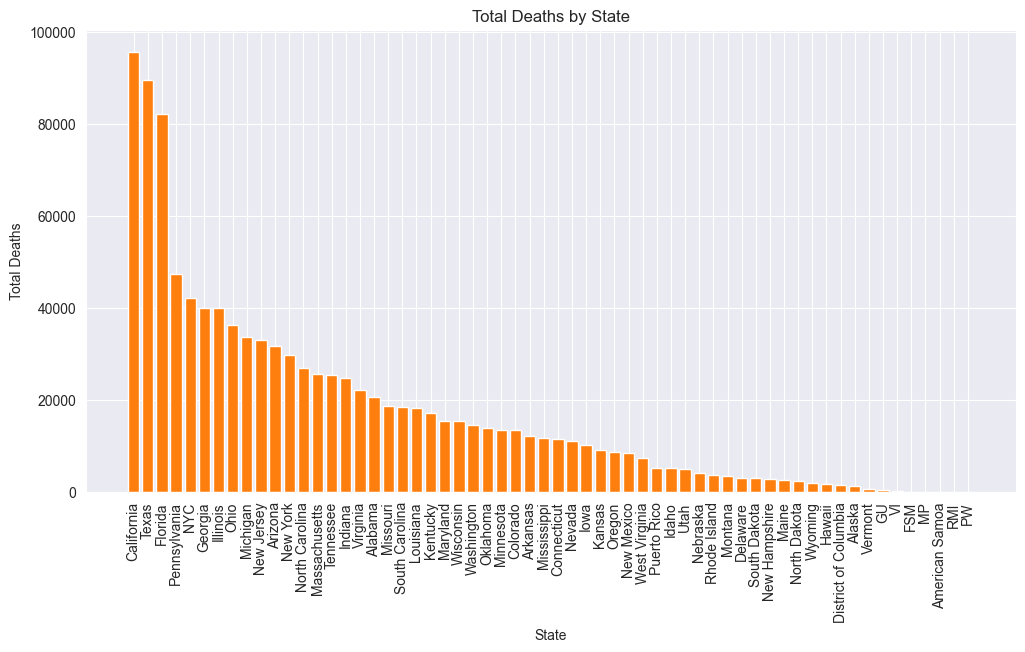

In [210]:
grouped_df = covid_df.groupby('state').agg({'new_death': 'sum'}).reset_index()
grouped_df_sorted = grouped_df.sort_values('new_death', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(grouped_df_sorted['state'], grouped_df_sorted['new_death'], color='tab:orange')
plt.xlabel('State')
plt.ylabel('Total Deaths')
plt.xticks(rotation=90)
plt.title("Total Deaths by State")
plt.show()

# The Big Three
From the graph below, the big three in terms of total death is California, Texas, and Florida.
If we were to compare this to the top three states in terms of population as of 2022, it follows the same course.

While it is not appropriate to come to a conclusion based on how covid spreads, it is fairly interesting to visualize the process of a higher population correlating to a higher death rate.


In [211]:
top_three_death = grouped_df_sorted.head(3)
top_three_death.columns = top_three_death.columns.str.replace("new_death", "Total Deaths")
top_three_death

,state,Total Deaths
5,California,95604
51,Texas,89429
11,Florida,82065


# Total Cases by State & Political Affiliation

Analyzing total COVID-19 cases by state and grouping them by political party affiliation can help understand the impact of political decisions, identify potential disparities in the number of cases, and inform public health policy decisions. 

However, it's important to note that COVID-19 is a complex issue with many factors at play, and political party affiliation is just one of many potential variables that could influence the number of cases. Therefore, any analysis should be carefully considecrimson and not relied upon as the sole source of information.

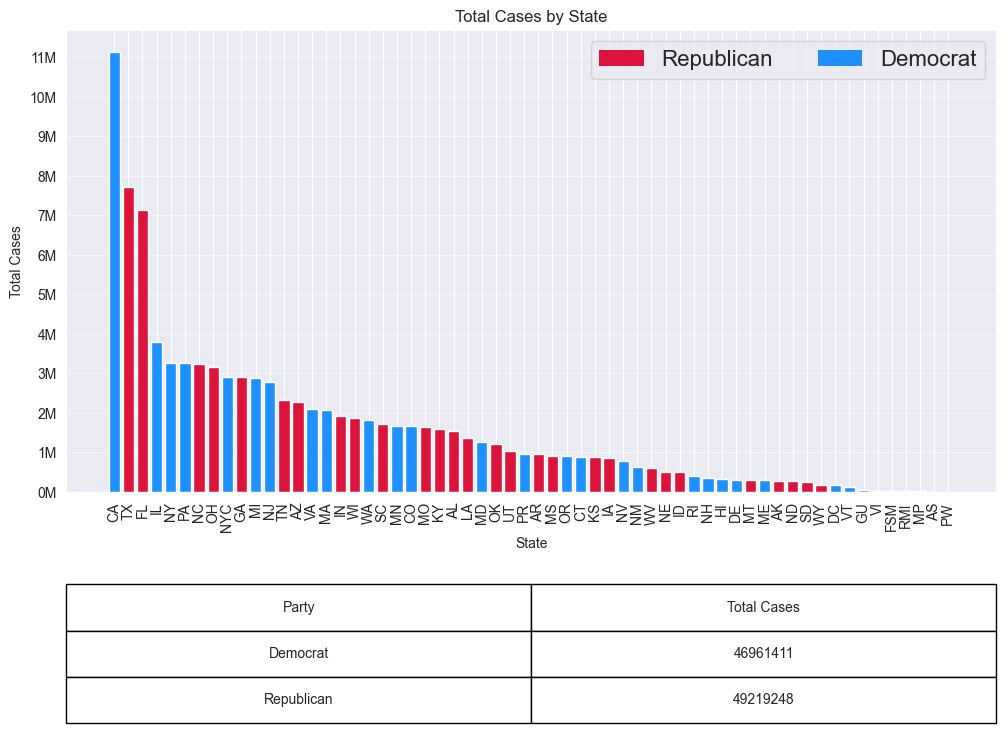

In [212]:
# Covid total cases by state and party 2022-12-31
# republic states 2020
republican_states_2020 = ['AL', 'AK', 'AZ', 'AR', 'FL', 'GA', 'ID', 'IN', 'IA', 'KS', 'KY', 'LA', 'MS', 'MO', 'MT', 'NE', 'NC', 'ND', 'OH', 'OK', 'SC', 'SD', 'TN', 'TX', 'UT', 'WV', 'WI', 'WY']

# democrat states 2020
democrat_states_2020 = ['CA', 'CO', 'CT', 'DE', 'HI', 'IL', 'ME', 'MD', 'MA', 'MI', 'MN', 'NV', 'NH', 'NJ', 'NM', 'NY', 'OR', 'PA', 'RI', 'VT', 'VA', 'WA', 'DC']

# group by state and sum new cases
grouped_df_copy = covid_df_copy.groupby('state').agg({'new_case': 'sum'}).reset_index()
grouped_df_sorted_copy = grouped_df_copy.sort_values('new_case', ascending=False)

# add party column
# grouped_df_sorted['Party'] = grouped_df_sorted['state'].apply(lambda x: 'Republican' if x in republican_states_2020 else 'Democrat')
grouped_df_sorted_copy['Party'] = grouped_df_sorted_copy['state'].apply(lambda x: 'Republican' if x in republican_states_2020 else 'Democrat')

# total cases by party
cases_by_party = grouped_df_sorted_copy.groupby('Party').agg({'new_case': 'sum'}).reset_index()
cases_by_party.columns = cases_by_party.columns.str.replace("new_case", "Total Cases")

# total cases by state
cases_by_state = grouped_df_sorted_copy.groupby('state').agg({'new_case': 'sum'}).reset_index()
cases_by_state.columns = cases_by_state.columns.str.replace("new_case", "Total Cases")
cases_by_state = cases_by_state.sort_values('Total Cases', ascending=False)

# config that ish
plt.figure(figsize=(12, 6))
plt.bar(cases_by_state['state'], cases_by_state['Total Cases'])
plt.xlabel('State')
plt.ylabel('Total Cases')
plt.xticks(rotation=90)
plt.title("Total Cases by State")

# change the color of the bars based on party
plt.bar(cases_by_state['state'], cases_by_state['Total Cases'], color=['crimson' if x in republican_states_2020 else 'dodgerblue' for x in cases_by_state['state']])

# represent y-axis in millions of cases by leading non-zero digits
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1000000)) + 'M'))

# change x-axis to abbreviations of states
plt.xticks(cases_by_state['state'])


# y-axis incrememt = 1 million
plt.yticks(np.arange(0, max(cases_by_state['Total Cases']), 1000000))

# add girdlines
plt.grid(axis='y', alpha=0.5)

# Legend showing total number of cases by party
plt.legend([plt.Rectangle((0,0),1,1,fc='crimson', edgecolor = 'none'), plt.Rectangle((0,0),1,1,fc='dodgerblue', edgecolor = 'none')], ['Republican', 'Democrat'], loc=1, ncol = 2, prop={'size':16})

# Table showing total number of cases by party
plt.table(cellText=cases_by_party.values, colLabels=cases_by_party.columns, loc='bottom', cellLoc='center', colLoc='center', bbox=[0, -0.5, 1, 0.3])

# plot that ish
plt.show()


# Total Deaths by State Region
In this analysis, we hope to dig into geographical regions and its potential trend in rising covid 19 deaths. For this, we are breaking America into four regions: Northeast, South, Midwest, and the West. With different climates, economics, and cultures, we hope to find if there are any patterns of differences in the number of Covid-19 deaths across these regions.

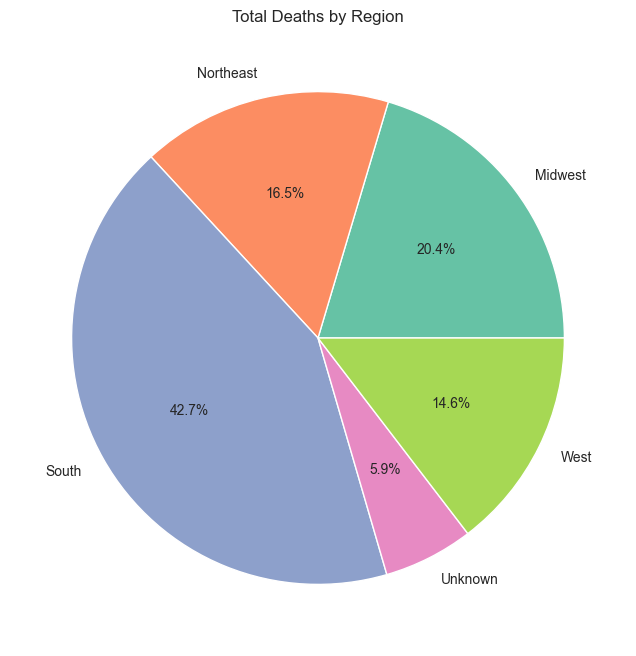

In [213]:
northeast_states = {'Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania'}
midwest_states = {'Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'}
south_states = {'Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia', 'Kentucky', 'Tennessee', 'Arkansas', 'Louisiana', 'Mississippi', 'Alabama', 'Arizona', 'New Mexico', 'Oklahoma', 'Texas'}
west_states = {'Colorado', 'Idaho', 'Montana', 'Nevada', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington'}

state_to_region = {}
for state in northeast_states:
    state_to_region[state] = 'Northeast'
for state in midwest_states:
    state_to_region[state] = 'Midwest'
for state in south_states:
    state_to_region[state] = 'South'
for state in west_states:
    state_to_region[state] = 'West'

covid_df['region'] = covid_df['state'].apply(lambda x: state_to_region.get(x, 'Unknown'))
deaths_by_region = covid_df.groupby('region')['tot_death'].sum()
sns.set_palette('Set2')
plt.figure(figsize=(8, 8))
deaths_by_region.plot(kind='pie', autopct='%1.1f%%')
plt.title('Total Deaths by Region')
plt.ylabel('')
plt.show()

# Results
In this part, we looked at the geographic distribution of Covid-19 Deaths across the four major regions in America. We can see the South has the highest amount of deaths at roughly 42.7% of recorded deaths. These results suggest there could be some sort of pattern. However, these results also could simply be due to the total amount of countries in each region. This graph should not be taken literally, but a good introduction to possible trends. In the next results, we will look into more possible ways to tie regional characteristics with covid cases.

# Total Cases By Region
In this analysis, we aim to explore geographical regions in the United States and their potential trends in rising COVID-19 cases. To accomplish this, we have divided the country into four regions: Northeast, South, Midwest, and West. Our objective is to determine if there are any discernible patterns in the number of COVID-19 cases across these regions. By analyzing these trends, we hope to gain insights into how the pandemic is impacting different areas of the country.

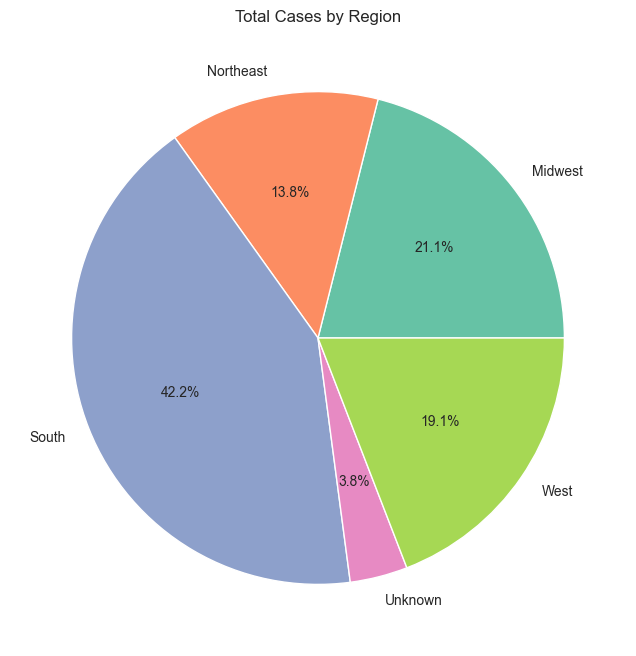

In [214]:
deaths_by_region = covid_df.groupby('region')['tot_cases'].sum()
sns.set_palette('Set2')
plt.figure(figsize=(8, 8))
deaths_by_region.plot(kind='pie', autopct='%1.1f%%')
plt.title('Total Cases by Region')
plt.ylabel('')
plt.show()

# Results
The following results be in the {Total Death % : Total Cases %}
South: 42.7% : 42.2%
West: 14.3% : 18.8%
Midwest: 20.4% : 21.1%
Northeast: 16.5% : 13.8%

# Total Cases - Choropleth Map
In this analysis, we're trying to offer an alternative visualization to see and understand cases by state at a glance. We're using a choropleth map to visualize the total number of cases per state. Another This will also help us to see if there are any patterns in the data that we can identify. Such as, states with high case numbers and whether neighboring states have similar numbers.

In [215]:
# chloropleth map of total cases by state
fig = px.choropleth(cases_by_state, locations='state', locationmode="USA-states", color='Total Cases', scope="usa", color_continuous_scale="Reds", title='Total Cases by State')
fig.show()


# Results 
As we can see here he darker the color, the higher the number of cases. This visualization allows us to see the total number of cases per state at a glance, and we can see that the states with the highest number of cases are California, Texas, and Florida. This is informationw we already know, but it's interesting to see states adjacent to certain states that were considered to be epicenters of the pandemic, such as the northeast region, who all appear to have a relatively elevated number of cases, this could be due to the fact that these states are in close proximity to each other who all have a high population density and a lot of commuting traffic, meaning people may have traveled between them during the pandemic. Or it could be due to the specific policies implemented by each state. These are things that we can explore further in future analyses. 

# More Data - CovidActNow.org API
Next we will incorporating new data provided by CovidActNow.org's API. They provide access to comprehensive COVID data — both current and historical. The data is available for all US states, counties, and metros and is aggregated from a number of official sources, quality assured, and updated daily. It is available in JSON and CSV formats. 

In [216]:
# CovidActNow API call
state = 'WI'
url_state_current = f'https://api.covidactnow.org/v2/state/{state}.json?apiKey={API_KEY}'
jsn = requests.get(url_state_current).json()

# prints json to show what data is available
# pprint(jsn)

In [217]:
def parse_json_current(jsn):
    s = pd.json_normalize(jsn).iloc[0]
    return s.rename('current')

df = parse_json_current(jsn)
df

fips                                                      55
country                                                   US
state                                                     WI
county                                                  None
hsa                                                     None
                                                        ... 
annotations.weeklyCovidAdmissionsPer100k                None
annotations.vaccinationsInitiatedRatio                  None
annotations.vaccinationsCompletedRatio                  None
annotations.vaccinationsAdditionalDoseRatio             None
annotations.vaccinationsFall2022BivalentBoosterRatio    None
Name: current, Length: 139, dtype: object

In [218]:
def pull_state_timeseries(state):
    url_state = f'https://api.covidactnow.org/v2/state/{state}.timeseries.json?apiKey={API_KEY}'
    return requests.get(url_state).json()

def pull_us_timeseries():
    url = f'https://api.covidactnow.org/v2/country/US.timeseries.json?apiKey={API_KEY}'
    return requests.get(url).json()

In [219]:
us_states_current = f'https://api.covidactnow.org/v2/states.json?apiKey={API_KEY}'
jsn = requests.get(us_states_current).json()
df_current = pd.DataFrame([item['metrics'] for item in jsn], index=[item['state'] for item in jsn] )
df_current['population'] = pd.Series([item['population'] for item in jsn], index=[item['state'] for item in jsn] )
df_current.head()

,testPositivityRatio,testPositivityRatioDetails,caseDensity,weeklyNewCasesPer100k,contactTracerCapacityRatio,infectionRate,infectionRateCI90,icuCapacityRatio,bedsWithCovidPatientsRatio,weeklyCovidAdmissionsPer100k,vaccinationsInitiatedRatio,vaccinationsCompletedRatio,vaccinationsAdditionalDoseRatio,vaccinationsFall2022BivalentBoosterRatio,population
AK,0.071,{'source': 'other'},3.7,25.7,None,0.91,0.22,0.72,0.014,3.8,0.732,0.653,0.325,0.141,731545
AL,0.035,{'source': 'other'},4.3,29.9,None,1.09,0.10,0.82,0.011,2.7,0.651,0.533,0.212,0.076,4903185
AR,0.064,{'source': 'other'},4.3,29.8,None,1.10,0.11,0.82,0.019,3.0,0.701,0.570,0.255,0.109,3017804
AZ,0.084,{'source': 'other'},6.3,44.0,None,1.12,0.10,0.67,0.029,3.9,0.783,0.662,0.332,0.156,7278717
CA,0.048,{'source': 'other'},4.3,30.4,None,1.13,0.10,0.71,0.020,3.5,0.850,0.749,0.442,0.204,39512223


# Current Population vs. Case Density - Scatter Plot
Here we are looking at the current population of each state and the case density. We are using a scatter plot to visualize the data. This help us to see if there is a correlation between the population per unit land area of a state and the number of cases.

### (In order to see data on a specifdic state, we can hover over the data point and see the state name and the number of cases per 100,000 people.)

In [220]:
fig2 = px.scatter(x=df_current.population, y=df_current.caseDensity, 
           size=df_current.population, hover_name=df_current.index, title='Population vs. Case Density')

# Change axis labels
fig2.update_xaxes(title_text='Population')
fig2.update_yaxes(title_text='Case Density')

fig2.show()



# Results
As we can see here, there is a positive correlation between the population per unit land area of a state and the number of cases. This is not surprising, as states with a higher population density are more likely to have a higher number of cases. However, it is interesting to see that there are some states with a relatively low population density that have a high number of cases.

In [221]:
def parse_json_historical(jsn):
    # extract all timeseries oriented data
    df_actuals = pd.DataFrame(jsn['actualsTimeseries']).set_index('date')
    df_metrics = pd.DataFrame(jsn['metricsTimeseries']).set_index('date')
    df_risk = pd.DataFrame(jsn['riskLevelsTimeseries']).set_index('date')
    df_risk = df_risk.add_prefix('risk_')

    # join together on date value
    df = pd.concat([df_actuals, df_metrics, df_risk],axis=1).reset_index()
    
    # set the date value to be an actual datetime typed object
    df['date'] = pd.to_datetime(df['date'])
    
    # append necessary metadata not in timeseries
    df['state'] = jsn['state']
    df['population'] = jsn['population']
    return df


In [222]:
def plot_timeseries(jsn_state, jsn_us, metric, ax=None):
    ''' Plots a given metric for a given state, highlights periods where the state exceeded national averages'''
    
    df = parse_json_historical(jsn_state)
    df_us = parse_json_historical(jsn_us)
    
    # extract the desired metric and put into series
    state = parse_json_historical(jsn_state)['state'].iloc[0] # infer state from data
    a = df.set_index('date')[metric].dropna().rename(state)
    b = df_us.set_index('date')[metric].reindex(a.index).rename('US Average')

    
    # Depending on the metric plotted, higher or lower may be good (green). Also, set the 
    # ylim param to some reasonable (and consistent) range
    param_dict = {'infectionRate':((0,2),'lower'),
         'caseDensity':((0,100),'lower'),
         'icuCapacityRatio':((0,1),'lower'),
         'icuHeadroomRatio':((0,1),'lower'),
         'vaccinationsInitiatedRatio':((0,.75),'higher'),
         'vaccinationsCompletedRatio':((0,.75),'higher'),         
         'testPositivityRatio':((0,0.25),'lower'),
        }    
    default_param = ((None,None),'lower')
    ylim, orientation = param_dict.get(metric, default_param) 
    
    
    # plot the data
    ax = a.plot(ylim=ylim, title=f'{metric}: {state}', legend=True, ax=ax)
    b.plot(color='darkblue', ls='--', lw=1, legend=True, ax=ax)

    up_color = 'darkgreen' if orientation == 'higher' else 'salmon'
    down_color = 'salmon' if orientation == 'higher' else 'darkgreen'

    ax.fill_between(a.index, a, b, where=a>b, facecolor=up_color, alpha=0.5)
    ax.fill_between(a.index, a, b, where=a<=b, facecolor=down_color, alpha=0.5)
    
    return

# Case Density - North vs. South - Seasonal Timeseries

In this analysis, we are looking at the case density in the north and south regions of the United States. We are using a timeseries to visualize the data. This will help us to see if there are any seasonal trends in the data. Such as, if there are more cases in the winter months than in the summer months.

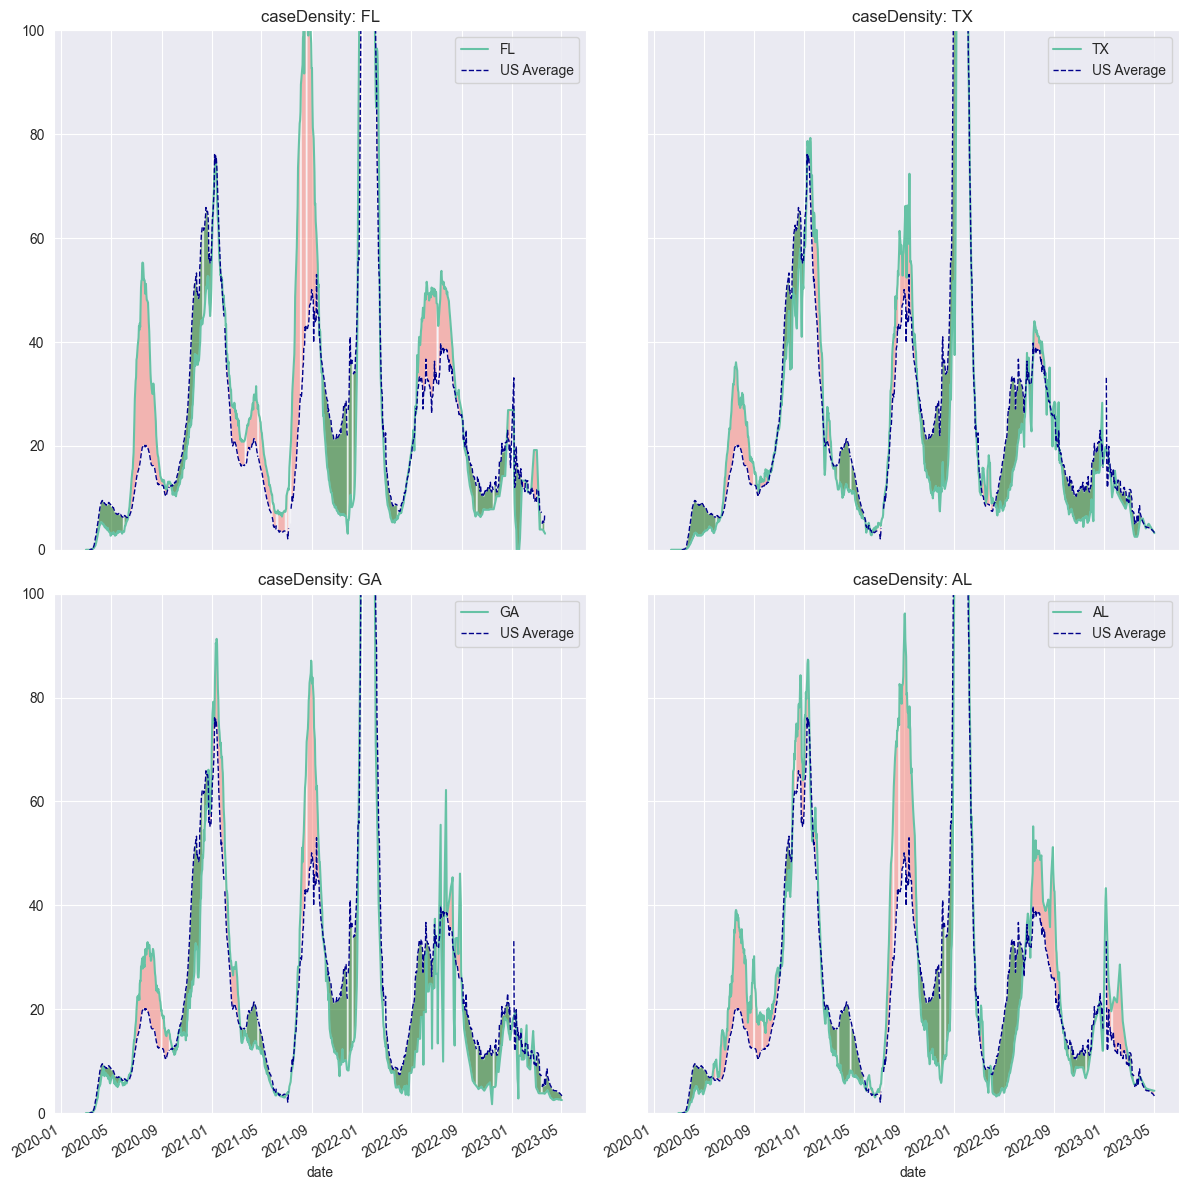

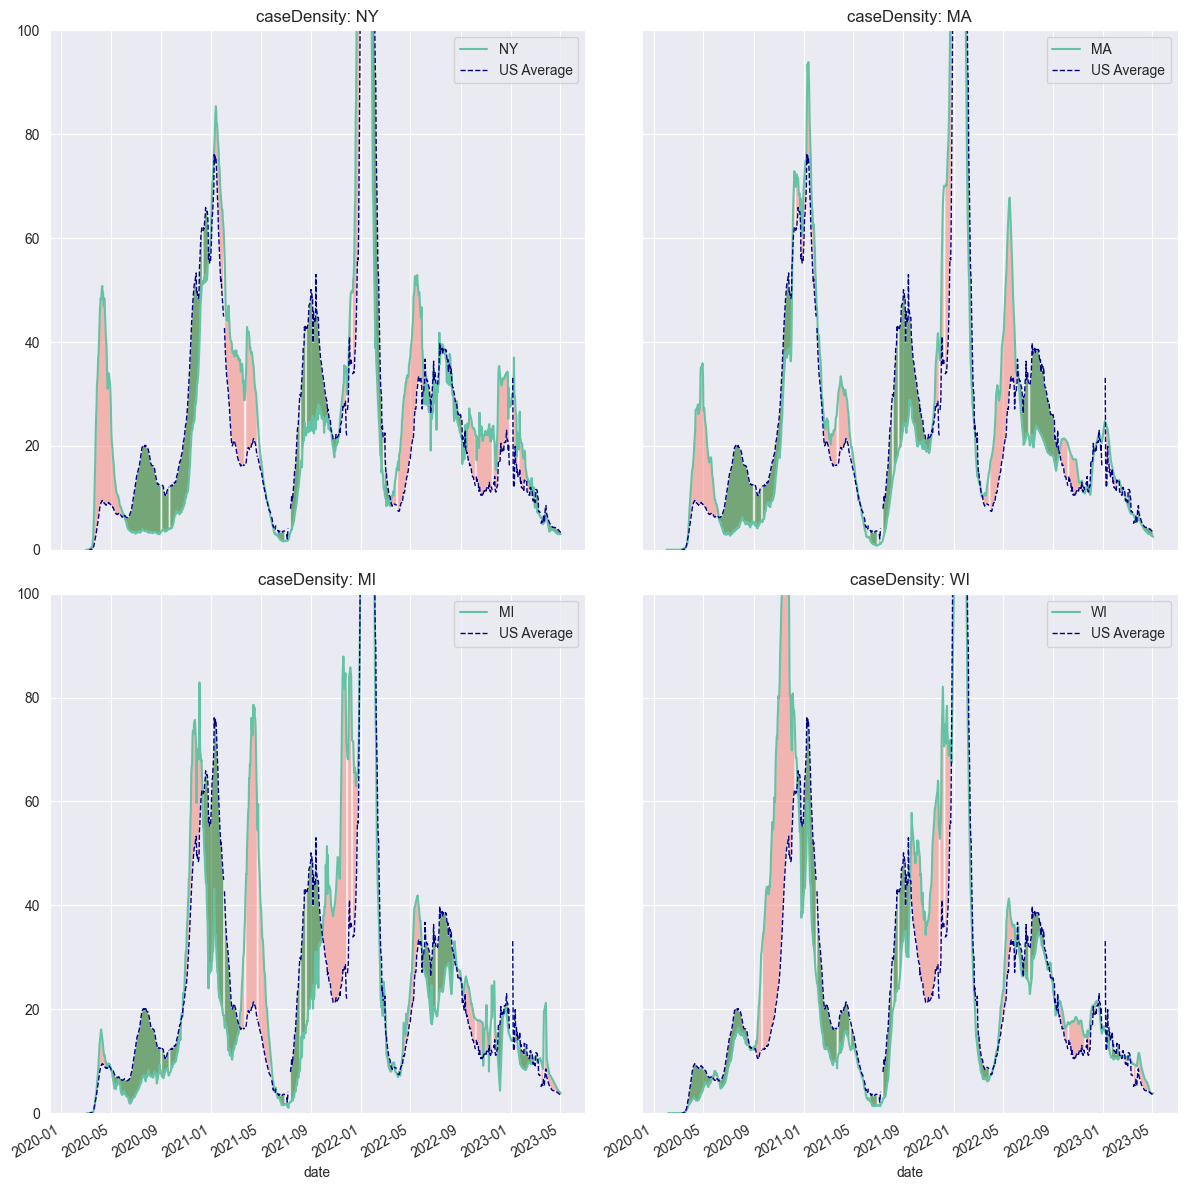

In [223]:
def compare_states(metric, states = ['FL','TN','GA','AL',
                                     'NY','MA','MI','WI']):
    jsn_us = pull_us_timeseries()
    
    num_states = len(states)
    num_cols = 2
    num_rows = (num_states-1)//num_cols + 1
    
    fig,axs = plt.subplots(num_rows,num_cols, figsize=(num_cols * 6,num_rows * 6), sharex=True, sharey=True)
    
    n = 0
    r,c = 0,0
    for state in states:
        jsn_state = pull_state_timeseries(state)
        c = n % num_cols
        r = n // num_cols

        if num_rows == 1: # handles cases where we need a single indexer or row and column indexers
            ax = axs[c]
        else: 
            ax = axs[r,c] 
        plot_timeseries(jsn_state, jsn_us,metric,ax=ax)
        n +=1
        
    plt.tight_layout()
    
    return

hot_states = ['FL','TX','GA','AL']
compare_states('caseDensity',states = hot_states)

cold_states = ['NY','MA','MI','WI']
compare_states('caseDensity',states = cold_states)

# Results

In the timeseries graphs above, we can see each grouping of graphs represents either the North or South region of the United States. We can see here that there is a seasonal trend in the data. There appears to be more cases in the winter months than in the summer months for states in the North. Conversely it appears as though southern states tend to have a higher case density on average during the summer months. This could be due to the fact that the southern states have a warmer climate, and people are more likely to be outside and in close proximity to each other during the summer months. Where as for northern states in the winter months, people are more likely to be indoors and in close proximity to each other.

While this data isn't really proof of anything, it's interesting to see that there is a seasonal trend in the data, but it's not exactly what you would expect when looking at the data for the southern region of the United States.

# Covid-19 Vaccination Analysis
While we could have decided to use the previous API for all data harvesting, we decided to opt into a more in depth analysis of State vaccinations. The following data that will be used for the remainder of this section comes from the [CDC](https://covid.cdc.gov/covid-data-tracker/#vaccinations). With this data, we can gain valuable insight into the effectiveness of vaccination strategies employed by various states. This dataset provides necessary information to continue to provide an in-depth analysis.

In [224]:
vaccination_df = pd.read_csv("US_Vaccinations.csv")
vaccination_df

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207,NaN,NaN
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222,NaN,NaN
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212,NaN,NaN
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226,NaN,NaN
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7498.0,1529.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54175,2023-04-29,Wyoming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,50.0,NaN,NaN,NaN
54176,2023-04-30,Wyoming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,41.0,NaN,NaN,NaN
54177,2023-05-01,Wyoming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,31.0,NaN,NaN,NaN
54178,2023-05-02,Wyoming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,22.0,NaN,NaN,NaN


In [225]:
vaccination_df['year'] = pd.DatetimeIndex(vaccination_df['date']).year
df_2021 = vaccination_df[vaccination_df['year'] == 2021].groupby('location')['daily_vaccinations'].sum()

df_2022 = vaccination_df[vaccination_df['year'] == 2022].groupby('location')['daily_vaccinations'].sum()

combined_df = pd.merge(df_2021, df_2022, on='location', suffixes=('_2021', '_2022'))
combined_df.drop('United States', inplace=True)
combined_df

,daily_vaccinations_2021,daily_vaccinations_2022
location,,
Alabama,5545039.0,1326957.0
Alaska,995279.0,283949.0
American Samoa,75024.0,39239.0
Arizona,10353490.0,3856617.0
Arkansas,3845037.0,1019862.0
...,...,...
Virginia,14270200.0,4825685.0
Washington,12361691.0,4782910.0
West Virginia,2401626.0,583758.0


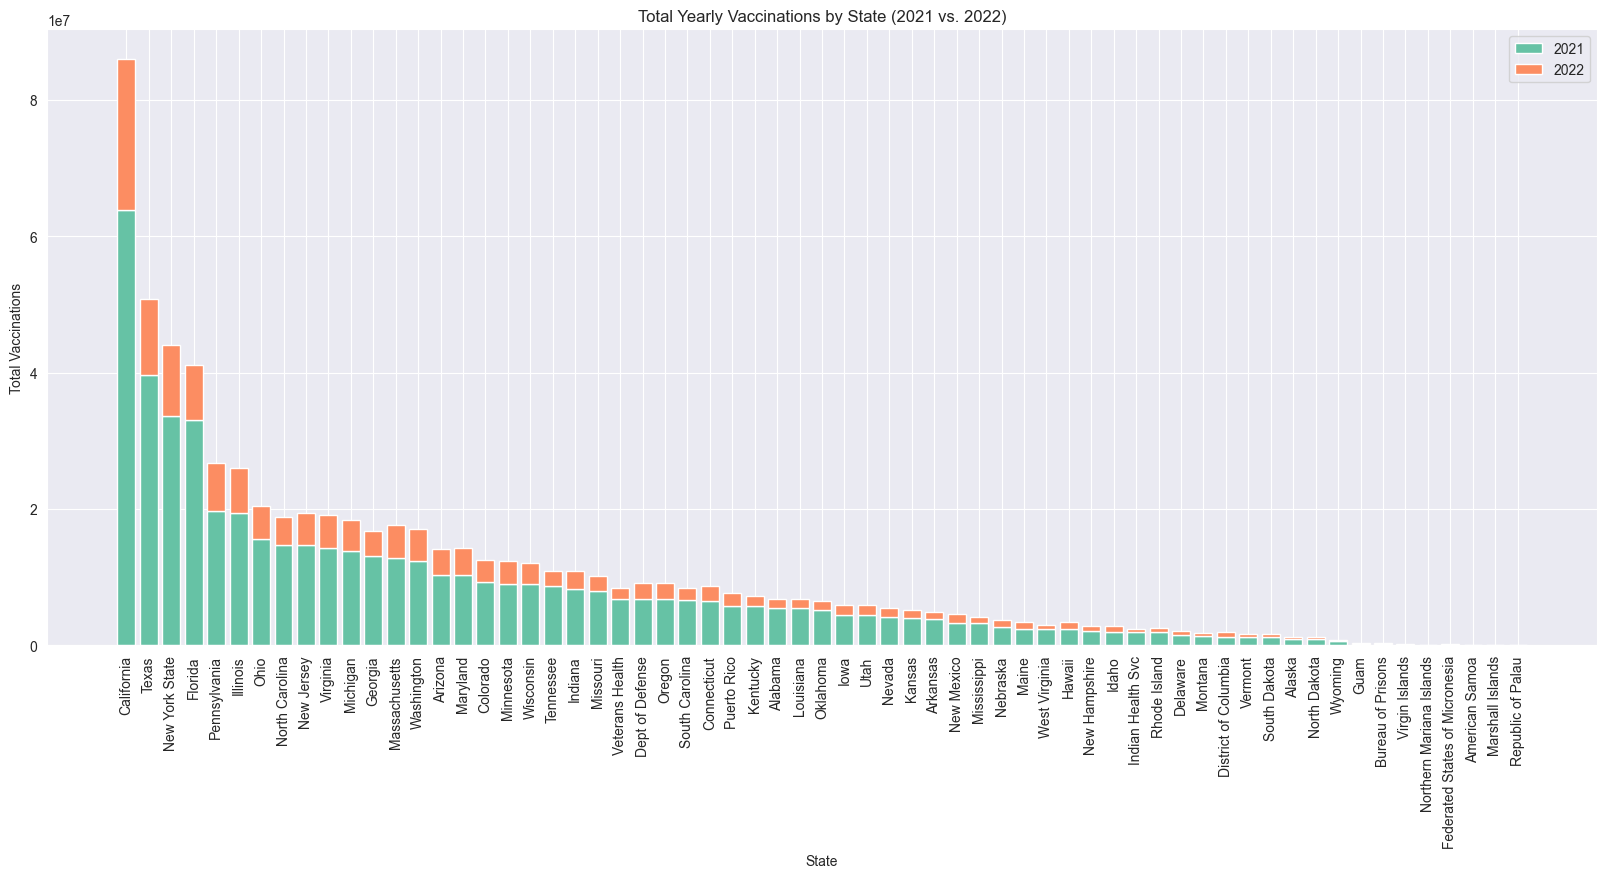

In [226]:
combined_df = combined_df.sort_values('daily_vaccinations_2021', ascending=False)

plt.figure(figsize=(20, 8))
plt.bar(combined_df.index, combined_df['daily_vaccinations_2021'], label='2021')
plt.bar(combined_df.index, combined_df['daily_vaccinations_2022'], bottom=combined_df['daily_vaccinations_2021'], label='2022')
plt.xticks(rotation=90)
plt.legend()
plt.title('Total Yearly Vaccinations by State (2021 vs. 2022)')
plt.xlabel('State')
plt.ylabel('Total Vaccinations')

plt.show()

# Results
The first wave of vaccines became publicly available early 2021, in which people were eager to get the vaccine. Through advertisement, eagerness to receive a vaccine, and state/job mandated vaccination policies, it becomes evident in 2021, vaccination rates were at an all-time high. However, as 2022 finished, vaccination rates sharply declined. This trend is worrisome, as covid-19 is an ever-evolving virus in which a single vaccine is uncertain to protect you against the many evolutions of this virus. In fact, the CDC recommends to continue getting booster shots every 6 months, to fight against this evolution. However, this sharp decline in vaccination rates could have played a large role in reducing the deadly effect of covid-19. While this table does not show the overall percentage of the population in which received the vaccination, it does show the lack of following up on proper guidelines from the CDC.

# Analysis of Vaccination Rates
In this part, we will analyze the total percentage of the population per state that received a covid-19 vaccine. The percentage which is recommended by the CDC to "stomp the curve" is roughly 70% of the population.

In [230]:
total_vaccinated = vaccination_df.loc[vaccination_df.groupby('location')['people_fully_vaccinated'].idxmax()]
total_vaccinated = total_vaccinated.loc[:, ['location', 'people_fully_vaccinated']]
total_vaccinated

,location,people_fully_vaccinated
841,Alabama,2611270.0
1683,Alaska,477506.0
2525,American Samoa,42487.0
3367,Arizona,4820249.0
4209,Arkansas,1719884.0
...,...,...
50811,Virginia,6554032.0
51653,Washington,5812366.0
52495,West Virginia,1071420.0
53337,Wisconsin,3980884.0


In [228]:
def get_state_abbr(state_name):
    for abbr, name in stateDictionary.items():
        if name == state_name:
            return abbr
    return None

state_population = pd.read_csv('State_Populations.csv')
state_population = state_population[['NAME', 'POPESTIMATE2022']]
merged_df = pd.merge(total_vaccinated, state_population, left_on='location', right_on='NAME')
merged_df = merged_df.drop(columns=['NAME'])
merged_df['vaccination_percentage'] = merged_df['people_fully_vaccinated'] / merged_df['POPESTIMATE2022'] * 100
merged_df['location'] = merged_df['location'].apply(get_state_abbr)
merged_df

,location,people_fully_vaccinated,POPESTIMATE2022,vaccination_percentage
0,AL,2611270.0,5074296,51.460735
1,AK,477506.0,733583,65.092294
2,AZ,4820249.0,7359197,65.499660
3,AR,1719884.0,3045637,56.470420
4,CA,29583959.0,39029342,75.799277
5,CO,4247213.0,5839926,72.727172
6,CT,2966448.0,3626205,81.805855
7,DE,715754.0,1018396,70.282483
8,DC,643873.0,671803,95.842531
9,FL,14967975.0,22244823,67.287454


In [229]:
color_mid = merged_df['vaccination_percentage'].median()
fig = px.choropleth(merged_df, locations='location', locationmode="USA-states", color='vaccination_percentage', scope="usa", color_continuous_scale="BLUES", title='Total Percentage Of Vaccinations')
fig.show()
vaccination_below_70 = merged_df[merged_df['vaccination_percentage'] < 70]
vaccination_below_70

,location,people_fully_vaccinated,POPESTIMATE2022,vaccination_percentage
0,AL,2611270.0,5074296,51.460735
1,AK,477506.0,733583,65.092294
2,AZ,4820249.0,7359197,65.499660
3,AR,1719884.0,3045637,56.470420
9,FL,14967975.0,22244823,67.287454
10,GA,6102280.0,10912876,55.918165
12,ID,1011990.0,1939033,52.190448
14,IN,3895825.0,6833037,57.014546
15,IA,2036179.0,3200517,63.620315
16,KS,1909430.0,2937150,65.009618


# Results
From the choropleth graph, it is interesting to see the clear separation between states which have a relatively high vaccination rates and states which have a low vaccination rate. According to the graph and updated table to show percentages below 70%, 30 states fail to meet the CDC guidance of having above 70% rate for fully vaccinated threshold. For reference, if the amount of people getting vaccinated did not sharply decline in 2022, this 70% rate would easily have been reached. A possible reason for such a low rate could easily be explained through social media or people simply being exhausted due to the strict restrictions brought by state to state. An important note is these totals are not representative of the total percentage until 5/6/2023. It is also important to note the population for 2022 is an estimate, and might differ from other researchers estimates.